# Prédiction des données boursières

NO CHATGPT !!!!!!!

Dans ce projet, Nous avons l'intention de créer un système complet qui peut récupérer des données réelles sur Internet, les préparer de manière appropriée, puis utiliser un modèle de deep learning pour prédire un résultat spécifique. 

## Importer les bibliothèques


In [2]:
# ....?????
import pandas as pd
import requests


/tmp/ipykernel_6957/4177415383.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Sélectionnez votre action préférée
Par exemple, Tesla, Google, etc.
Consultez son historique des prix sur Google.

## Obtenez votre clé API
https://www.alphavantage.co/support/#api-key

## Utilisez la documentation de l'API pour charger les données quotidiennes
https://www.alphavantage.co/documentation/#daily

À la fin de cet exemple, vous devriez avoir une table contenant :

|   |1. open|2. high|3. low|4. close|5. volume|
|---|-------|-------|------|--------|---------|
|2024-03-19|	191.4900|	193.5800|	190.2800|	193.3400|	5317341|

In [3]:

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=ZVH4SXDSEOWIYENY&outputsize=full'
r = requests.get(url)
data = r.json()

print(data)

data=pd.DataFrame(data['Time Series (Daily)']).T
display(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'IBM', '3. Last Refreshed': '2024-03-20', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2024-03-20': {'1. open': '192.8700', '2. high': '193.9800', '3. low': '191.3100', '4. close': '193.9600', '5. volume': '3238643'}, '2024-03-19': {'1. open': '191.4900', '2. high': '193.5800', '3. low': '190.2800', '4. close': '193.3400', '5. volume': '5317341'}, '2024-03-18': {'1. open': '191.7000', '2. high': '193.2300', '3. low': '190.3200', '4. close': '191.6900', '5. volume': '5410562'}, '2024-03-15': {'1. open': '191.9900', '2. high': '193.0573', '3. low': '190.7000', '4. close': '191.0700', '5. volume': '8828184'}, '2024-03-14': {'1. open': '196.9500', '2. high': '197.7480', '3. low': '192.1200', '4. close': '193.4300', '5. volume': '4102202'}, '2024-03-13': {'1. open': '197.5500', '2. high': '198.1000', '3. low': '195.3200', '4. close': '196.7000', '5. vo

,1. open,2. high,3. low,4. close,5. volume
2024-03-20,192.8700,193.9800,191.3100,193.9600,3238643
2024-03-19,191.4900,193.5800,190.2800,193.3400,5317341
2024-03-18,191.7000,193.2300,190.3200,191.6900,5410562
2024-03-15,191.9900,193.0573,190.7000,191.0700,8828184
2024-03-14,196.9500,197.7480,192.1200,193.4300,4102202
...,...,...,...,...,...
1999-11-05,92.7500,92.9400,90.1900,90.2500,13737600
1999-11-04,94.4400,94.4400,90.0000,91.5600,16697600
1999-11-03,95.8700,95.9400,93.5000,94.3700,10369100
1999-11-02,96.7500,96.8100,93.6900,94.8100,11105400


# Prétraitement des données
Triez les données par date et `rename` les noms de colonnes en `Open, High, Low, Close, Volume`. Convertissez la date de chaîne de caractères en temps et les prix de `chaîne` en `float`. Pour convertir l'index en date, vous pouvez utiliser `pd.to_datetime()`.

À la fin de cette partie, `print(data.index)` devrait afficher `DatetimeIndex(.....)` et `data.dtypes` devrait afficher toutes les colonnes comme float64.

Exemple de sortie :
 |   |Open|High|Low|Close|Volume|
|---|-------|-------|------|--------|---------|
|2024-03-19|	191.4900|	193.5800|	190.2800|	193.3400|	5317341|

In [4]:
data=data.rename({'1. open':'Open', '2. high': 'High', '3. low':'Low', '4. close': "Close", '5. volume': 'Volume'}, axis=1)
data.index=pd.to_datetime(data.index)
data=data.astype(float)
data=data.sort_index()
data

,Open,High,Low,Close,Volume
1999-11-01,98.50,98.8100,96.37,96.75,9551800.0
1999-11-02,96.75,96.8100,93.69,94.81,11105400.0
1999-11-03,95.87,95.9400,93.50,94.37,10369100.0
1999-11-04,94.44,94.4400,90.00,91.56,16697600.0
1999-11-05,92.75,92.9400,90.19,90.25,13737600.0
...,...,...,...,...,...
2024-03-14,196.95,197.7480,192.12,193.43,4102202.0
2024-03-15,191.99,193.0573,190.70,191.07,8828184.0
2024-03-18,191.70,193.2300,190.32,191.69,5410562.0
2024-03-19,191.49,193.5800,190.28,193.34,5317341.0


# Objectif
Dans cette partie, notre objectif est de nous concentrer sur la prédiction du prix de clôture de l'action sélectionnée. Le prix de clôture est particulièrement important car il représente le dernier prix auquel une transaction a été conclue à la fin de la journée de trading.

Pour ce faire, nous devons isoler la colonne contenant les prix de clôture dans notre ensemble de données. En ne conservant que cette colonne, nous simplifions notre analyse pour nous concentrer sur la caractéristique principale que nous souhaitons prédire.

À la fin, vous devez avoir une table comme suit :

| | Clôture |
|--|--|
| 2023-03-19 | 191 |

In [5]:
data=data[["Close"]]
data

,Close
1999-11-01,96.75
1999-11-02,94.81
1999-11-03,94.37
1999-11-04,91.56
1999-11-05,90.25
...,...
2024-03-14,193.43
2024-03-15,191.07
2024-03-18,191.69
2024-03-19,193.34


# Division des données d'entraînement et de test
Utilisez le dernier mois pour les tests et le reste pour l'entraînement.

Dans cette étape, nous allons diviser notre ensemble de données en ensembles d'entraînement et de test. Pour ce faire, nous utiliserons les données du dernier mois comme ensemble de test et le reste comme ensemble d'entraînement.

L'ensemble de test contiendra les données à partir du 21 février 2024, tandis que l'ensemble d'entraînement comprendra les données jusqu'au 20 février 2024. Cette division nous permettra d'évaluer les performances de notre modèle sur des données non vues, ce qui est essentiel pour vérifier sa capacité à généraliser à de nouvelles observations.

In [6]:
test=data[data.index>=(data.index.max()-pd.Timedelta(days=30))]
train=data[data.index<(data.index.max()-pd.Timedelta(days=30))]
display(train)
display(test)

,Close
1999-11-01,96.75
1999-11-02,94.81
1999-11-03,94.37
1999-11-04,91.56
1999-11-05,90.25
...,...
2024-02-12,186.16
2024-02-13,183.70
2024-02-14,183.57
2024-02-15,186.87


,Close
2024-02-20,183.44
2024-02-21,179.70
2024-02-22,184.21
2024-02-23,185.72
2024-02-26,184.13
2024-02-27,184.87
2024-02-28,185.30
2024-02-29,185.03
2024-03-01,188.20
2024-03-04,193.06


## Afficher le graphique de l'historique des prix pour les données d'entraînement
Par exemple : <img src="imgs/image.png" width="200px"/>

<Axes: >

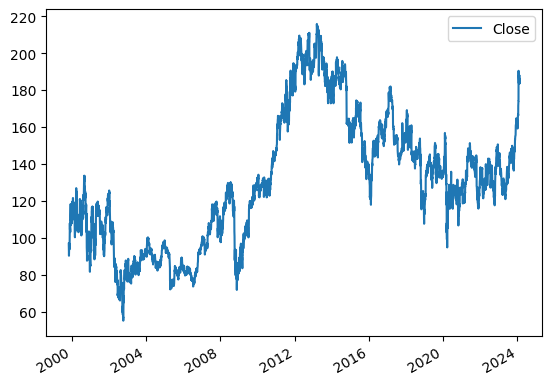

In [7]:
train.plot.line()

## Afficher le graphique de l'historique des prix pour les données de test

<Axes: >

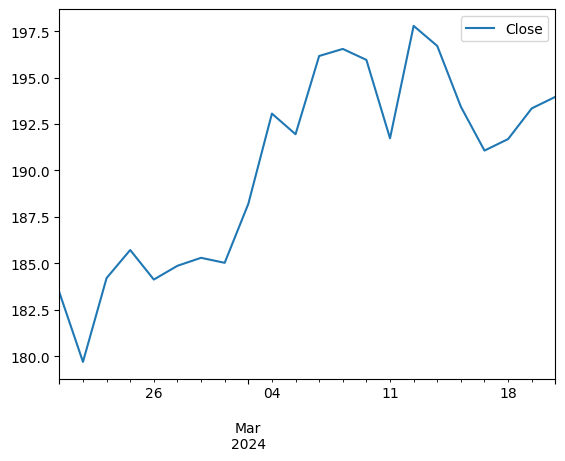

In [8]:
test.plot.line()

## Normalisation des données
La standardisation des caractéristiques peut rendre le processus d'optimisation plus stable en maintenant les gradients dans une plage similaire. Cela peut prévenir les instabilités numériques et faciliter l'entraînement des réseaux neuronaux profonds.

Pour ce faire, nous utiliserons un StandardScaler de Scikit-learn pour mettre à l'échelle les données d'entraînement et de test.

Utilisez une variable nommée `scaler` pour le modèle de mise à l'échelle.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(train)
scaledTrain=scaler.transform(train)
print(scaledTrain)
scaledTest=scaler.transform(test)
print(scaledTest)

[[-0.94303176]
 [-0.99785356]
 [-1.01028737]
 ...
 [ 1.51038523]
 [ 1.60363881]
 [ 1.62539798]]
[[1.5067116 ]
 [1.40102421]
 [1.52847077]
 [1.57114135]
 [1.52621008]
 [1.54712149]
 [1.55927271]
 [1.55164287]
 [1.64122283]
 [1.77855993]
 [1.74719281]
 [1.86616178]
 [1.87690007]
 [1.86022746]
 [1.74097591]
 [1.91194081]
 [1.88142145]
 [1.78901563]
 [1.72232519]
 [1.73984556]
 [1.78647235]
 [1.80399272]]


## Fenêtre glissante (Sliding Window)
Une fenêtre glissante est une technique couramment utilisée dans l'analyse de séries temporelles, y compris l'analyse des données boursières. Elle consiste à déplacer une fenêtre de taille fixe le long de l'axe temporel des données pour capturer des motifs ou des tendances dans cette fenêtre.

Par exemple, une fenêtre glissante fait référence à un intervalle de temps de taille fixe (par exemple, un jour, une semaine ou un mois) qui se déplace séquentiellement à travers les prix historiques des actions. À chaque étape, la fenêtre capture un sous-ensemble des données historiques, tel que les prix de clôture des actions, dans cet intervalle.
![](imgs/sliding_window.webp)

Dans cet exemple, nous utiliserons une fenêtre glissante de 60 jours pour prédire le jour suivant. Par conséquent, nous construirons une séquence de changements sur les 60 jours et la fournirons à un LSTM.

### Préparation du jeu de données pour l'entraînement
Créons le nouveau jeu de données pour l'entraînement


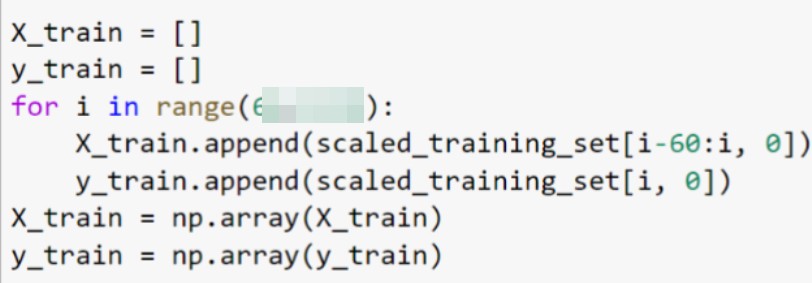


Dans ce cas, cela signifie que nous essayons de prédire le prochain point de données en fonction des données des 60 jours précédents.

À la fin, vos `X_train` et `y_train` devraient avoir une taille de (TailleEntraînement, 60, 1) et (TailleEntraînement,1).



In [10]:
X_train=[]
y_train=[]
for i in range(60,len(scaledTrain)):
    X_train.append(scaledTrain[i-60:i])
    y_train.append(scaledTrain[i])

import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
print(X_train.shape,y_train.shape)

(6053, 60, 1) (6053, 1)


### Préparer le jeu de données pour le test
À la fin, vos X_test et y_test doivent avoir une taille de (taille_test, 60, 1) et (taille_test, 1).

Attention, vous devez inclure les 60 derniers jours des données d'entraînement, car nous avons besoin du dernier motif.

In [11]:
X_test=[]
y_test=[]
new_scaled_test=np.concatenate((scaledTrain[-60:],scaledTest),axis=0)
for i in range(60,len(new_scaled_test)):
    X_test.append(new_scaled_test[i-60:i])
    y_test.append(new_scaled_test[i])

import numpy as np
X_test=np.array(X_test)
y_test=np.array(y_test)
print(X_test.shape,y_test.shape)

(22, 60, 1) (22, 1)


# Créer le modèle LSTM
Dans cet exemple, nous utiliserons un modèle RNN qui est expert dans la capture des relations à long terme en plus des relations à court terme.
Vous pouvez définir un LSTM en utilisant :
```
from keras.model import LSTM
LSTM(units=50, return_sequences=True)
```
`return_sequences=True` indique que cette couche produira la séquence complète des états cachés plutôt que seulement le dernier.

Pour créer le modèle séquentiel :
- Ajoutez une couche `Input` avec la forme (60, 1) (Pourquoi?)
- Ajoutez 3 couches `LSTM` avec 50 unités en retournant les séquences.
- Ajoutez 1 couche `LSTM` avec 50 unités sans retourner les séquences pour avoir seulement le dernier état.
- Ajoutez 1 couche `Dense` avec une seule unité qui applique une transformation linéaire aux données d'entrée, produisant une seule valeur de sortie.

In [12]:
import keras
from keras.models import Sequential
from keras.layers import LSTM,Input,Dense
model=Sequential([
    Input((60,1)),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50),
    Dense(units=1)
])

model

2024-03-21 07:26:28.355942: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 07:26:30.941632: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 07:26:30.941730: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 07:26:31.333592: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-21 07:26:32.201384: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 07:26:32.202912: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Compiler le modèle
Pour compiler le modèle, utilisez l'optimiseur 'adam' et la fonction de perte 'mean_squared_error'. Cela se fait en appelant la méthode compile sur votre modèle.

L'optimiseur Adam est une méthode d'optimisation couramment utilisée pour entraîner des réseaux de neurones. Il adapte automatiquement le taux d'apprentissage pendant l'entraînement, ce qui peut accélérer la convergence et améliorer les performances du modèle.

La fonction de perte 'mean_squared_error' calcule l'erreur moyenne au carré entre les valeurs prédites par le modèle et les valeurs réelles. Elle est couramment utilisée dans les tâches de régression pour évaluer la précision du modèle sur les données de test.

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

## Entraîner le modèle
Entraînez le modèle avec 10 époques. Cela signifie que le modèle sera exposé à l'ensemble des données d'entraînement 10 fois. Pendant chaque époque, le modèle ajustera ses poids et biais pour minimiser la perte définie par la fonction de perte.

In [14]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10


190/190 [==============================] - 17s 65ms/step - loss: 0.0677
Epoch 2/10
190/190 [==============================] - 12s 64ms/step - loss: 0.0187
Epoch 3/10
190/190 [==============================] - 12s 63ms/step - loss: 0.0144
Epoch 4/10
190/190 [==============================] - 12s 62ms/step - loss: 0.0109
Epoch 5/10
190/190 [==============================] - 12s 63ms/step - loss: 0.0079
Epoch 6/10
190/190 [==============================] - 12s 63ms/step - loss: 0.0058
Epoch 7/10
190/190 [==============================] - 12s 62ms/step - loss: 0.0045
Epoch 8/10
190/190 [==============================] - 12s 61ms/step - loss: 0.0038
Epoch 9/10
190/190 [==============================] - 12s 62ms/step - loss: 0.0037
Epoch 10/10
190/190 [==============================] - 12s 64ms/step - loss: 0.0042


## Prédire les données de test

Prédisez les données de test et examinez la plage de sortie.

In [15]:
pred=model.predict(X_test)

1/1 [==============================] - 1s 990ms/step


Comme vous pouvez le voir dans la dernière sortie, les données sont proches de 1, mais la valeur de l'action est d'environ, par exemple, 100 $.

Cela est dû à l'utilisation de l'échelle (`scaler`) que nous avons utilisée.

Nous pouvons utiliser `scaler.inverse_transform` pour annuler l'échelle de la sortie.

## Rétablir l'échelle de la prédiction

In [16]:
unscaled_pred=scaler.inverse_transform(pred)
unscaled_pred

array([[186.74284],
       [183.00197],
       [179.10564],
       [183.46083],
       [184.96523],
       [183.6969 ],
       [184.29913],
       [184.67294],
       [184.45119],
       [187.26308],
       [191.43182],
       [191.26227],
       [194.44186],
       [195.37271],
       [195.14226],
       [191.5444 ],
       [196.31566],
       [196.02335],
       [193.30798],
       [190.93271],
       [191.47282],
       [192.98286]], dtype=float32)

## Plot: Tracer la valeur prédite et la valeur réelle



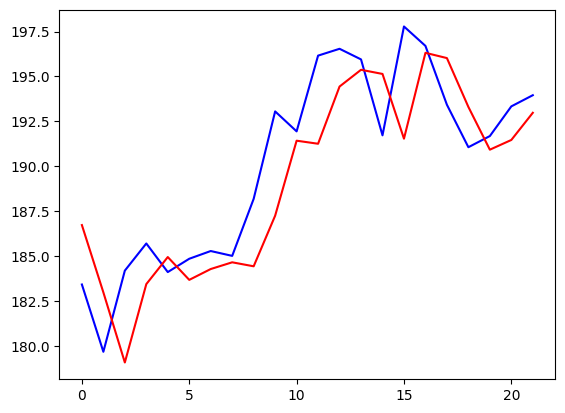

In [17]:
new_data=np.concatenate((y_test,pred),axis=1)
import matplotlib.pyplot as plt
plt.plot(test['Close'].values,color="blue",label='actual')
plt.plot(unscaled_pred,color="red",label='prediction')


# Réessayer avec plus de données

Ajoutez `&outputsize=full` à l'URL pour obtenir des données sur les actions datant de 20 ans. Cela améliore-t-il la qualité des prédictions ?
Comparez les résultats.

In [ ]:
# Afficher les résultats comparés

Expliquez si ces prédictions sont bonnes ou non ? Feriez-vous confiance à ce modèle pour investir de l'argent réel ?

# Simulez votre bénéfice.


Supposons que vous comptiez sur ce modèle pour acheter ou vendre des actions. Montrez votre bénéfice total si vous commencez avec 10 actions et un capital de 1000 $ chaque jour. Vous achetez 10 % de vos actions si le prix prévu de demain est plus élevé et que vous avez de l'argent, et vous vendez 10 % de vos actions si la valeur prévue de demain est inférieure et que vous avez des actions.


1. Initialize variables to keep track of the number of shares owned and the available capital.
2. Iterate through each day's prediction:
   - If the predicted price for the next day is higher than the current day and you have available capital, buy 10% of your shares.
   - If the predicted price for the next day is lower than the current day and you have shares to sell, sell 10% of your shares.
3. Calculate the total value of your portfolio at the end of the simulation.
